<a href="https://colab.research.google.com/github/AkshiMehra/Deep-learning-Neural-Network/blob/main/Gradient_descent_variations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
from IPython.display import HTML
from sklearn.datasets import make_blobs

In [16]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=2,random_state=0)
labels=labels.reshape(1000,1)
print(data.shape,labels.shape)


(1000, 2) (1000, 1)


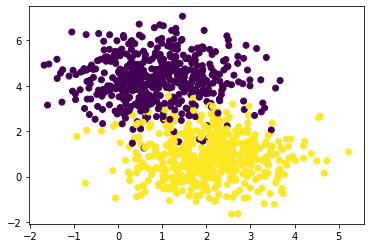

In [17]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

# Momentum_based_SGD

In [42]:
class SigmoidNeuron_msgd:
  
  def __init__(self,X):
    self.w=np.random.random((1,X.shape[1]))
    self.b=0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, gamma=0.5, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = []
    
    v_w=np.zeros((1,X.shape[1]))
    v_b=0
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = np.zeros((1,X.shape[1]))
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      v_w=gamma*v_w+learning_rate * dw 
      v_b=gamma*v_b+learning_rate * db       
      self.w -= v_w
      self.b -= v_b
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred, Y))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = (self.sigmoid(self.perceptron(x))>=0.5).astype(np.int)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


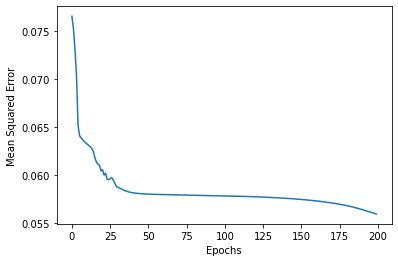

In [43]:
sng=SigmoidNeuron_msgd(data)
sng.fit(data,labels,200,0.05,0.6,True,True)

In [44]:
y_ped=sng.predict(data)
print(accuracy_score(y_ped,labels))
print(mean_squared_error(y_ped,labels))

0.943
0.057


#Nestrove accelerated sgd!


In [21]:
class SigmoidNeuron_nstrov:
  
  def __init__(self,X):
    self.w=np.random.random((1,X.shape[1]))
    self.b=0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, gamma=0.5, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = []
    
    v_w=np.zeros((1,X.shape[1]))
    v_b=0
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = np.zeros((1,X.shape[1]))
      db = 0
      self.w-=gamma*v_w
      self.b-=gamma*v_b
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)     
      self.w -= learning_rate*dw
      self.b -= learning_rate*db

      v_w=gamma*v_w+learning_rate * dw 
      v_b=gamma*v_b+learning_rate * db  
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred, Y))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = (self.sigmoid(self.perceptron(x))>=0.5).astype(np.int)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


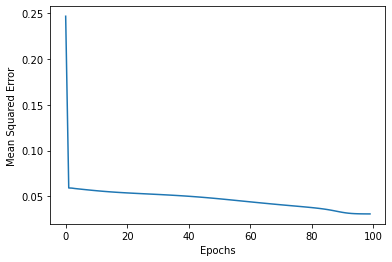

In [22]:
obj2=SigmoidNeuron_nstrov(data)
obj2.fit(data,labels,100,0.2,0.1,True,True)

In [23]:
y_pred1=obj2.predict(data)
print(accuracy_score(y_pred1,labels))
print(mean_squared_error(y_pred1,labels))

0.959
0.041


# Stochastic Gradient Descent!

In [24]:
class SigmoidNeuron_stoch:
  
  def __init__(self,X):
    self.w=np.random.random((1,X.shape[1]))
    self.b=0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, gamma=0.5, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = []
    
    v_w=np.zeros((1,X.shape[1]))
    v_b=0
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = np.zeros((1,X.shape[1]))
      db = 0
      for x, y in zip(X, Y):
        dw = self.grad_w(x, y)
        db = self.grad_b(x, y)     
        self.w -= learning_rate*dw
        self.b -= learning_rate*db

      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred, Y))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = (self.sigmoid(self.perceptron(x))>=0.5).astype(np.int)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


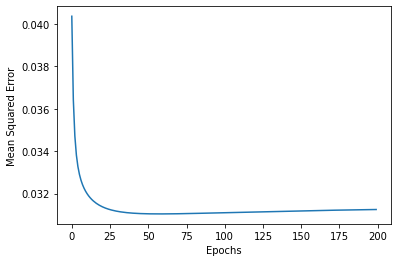

0.957
0.043


In [25]:
obj4=SigmoidNeuron_stoch(data)
obj4.fit(data,labels,200,1,0.5,True,True)
y_pred_stoch=obj4.predict(data)
print(accuracy_score(y_pred_stoch,labels))
print(mean_squared_error(y_pred_stoch,labels))

# Mini_batch gradient descent!

In [26]:
class SigmoidNeuron_mini:
  
  def __init__(self,X):
    self.w=np.random.random((1,X.shape[1]))
    self.b=0
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, batch_size=4 , learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = []
    
    v_w=np.zeros((1,X.shape[1]))
    v_b=0
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = np.zeros((1,X.shape[1]))
      db = 0
      c=0
      for x, y in zip(X, Y):
        dw = self.grad_w(x, y)
        db = self.grad_b(x, y) 
        
        c+=1
        if  c % batch_size==0:    
          self.w -= learning_rate*dw
          self.b -= learning_rate*db

      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred, Y))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = (self.sigmoid(self.perceptron(x))>=0.5).astype(np.int)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


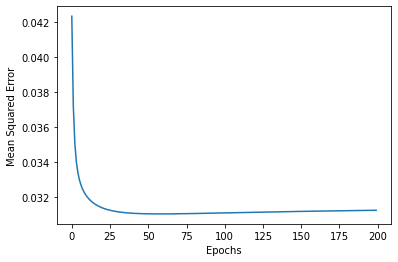

0.957
0.043


In [27]:
obj5=SigmoidNeuron_mini(data)
obj5.fit(data,labels,200,1,0.5,True,True)
y_pred_m=obj4.predict(data)
print(accuracy_score(y_pred_m,labels))
print(mean_squared_error(y_pred_m,labels))

# So, Above were some variations of Gradient Descent Algorithms.
*1*. Just like we had stochastic and mini_batch algorithm for Batch or Vanilla gradient descent, in the same manner, we can use stochastic nestrov or mini_batch nestrov based alogorithms!